# Import

In [157]:
# Basic import
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
# Augmentation
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Read excel


In [ ]:
df = pd.read_excel('/kaggle/input/miniddsm2/Data-MoreThanTwoMasks/Data-MoreThanTwoMasks.xlsx')
df.head()

In [ ]:
print(df.groupby('Status').size())

In [41]:
df_benign.head()

,fullPath,fileName,View,Side,Status,Age,Density,Tumour_Contour,Tumour_Contour2,Tumour_Contour3,Tumour_Contour4,Tumour_Contour5,Tumour_Contour6,fullPath2
0,Benign\0029\C_0029_1.LEFT_CC.png,C_0029_1.LEFT_CC.png,CC,LEFT,Benign,66.0,3,Benign\0029\C_0029_1.LEFT_CC_Mask.png,-,NaN,NaN,NaN,NaN,Benign/0029/C_0029_1.LEFT_CC.png
1,Benign\0029\C_0029_1.LEFT_MLO.png,C_0029_1.LEFT_MLO.png,MLO,LEFT,Benign,66.0,3,Benign\0029\C_0029_1.LEFT_MLO_Mask.png,-,NaN,NaN,NaN,NaN,Benign/0029/C_0029_1.LEFT_MLO.png
2,Benign\0029\C_0029_1.RIGHT_CC.png,C_0029_1.RIGHT_CC.png,CC,RIGHT,Benign,66.0,3,-,-,NaN,NaN,NaN,NaN,Benign/0029/C_0029_1.RIGHT_CC.png
3,Benign\0029\C_0029_1.RIGHT_MLO.png,C_0029_1.RIGHT_MLO.png,MLO,RIGHT,Benign,66.0,3,-,-,NaN,NaN,NaN,NaN,Benign/0029/C_0029_1.RIGHT_MLO.png
4,Benign\0033\C_0033_1.LEFT_CC.png,C_0033_1.LEFT_CC.png,CC,LEFT,Benign,60.0,3,-,-,NaN,NaN,NaN,NaN,Benign/0033/C_0033_1.LEFT_CC.png


In [85]:
df_cancer = df[df['Status'] == 'Cancer']
df_cancer.loc[:, 'fullPath']  = df_cancer['fullPath'].str.replace('\\', '/',regex=False)

df_normal = df[df['Status'] == 'Normal']
df_normal.loc[:, 'fullPath']  = df_normal['fullPath'].str.replace('\\', '/', regex=False)
print(len(df_cancer))
print(len(df_normal))

2684
2716
2408


/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Cancer/0001/C_0001_1.LEFT_CC.png


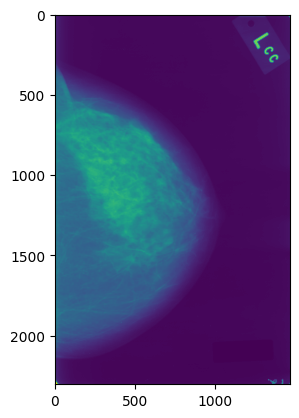

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Cancer/0001/C_0001_1.LEFT_MLO.png


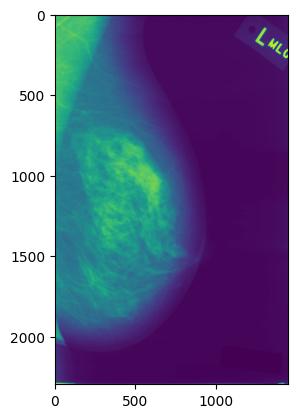

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Cancer/0001/C_0001_1.RIGHT_CC.png


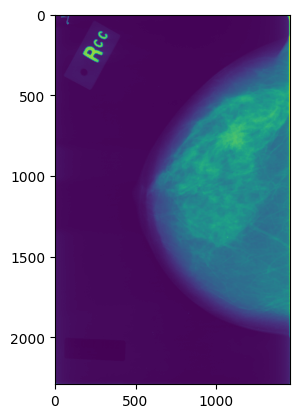

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Cancer/0001/C_0001_1.RIGHT_MLO.png


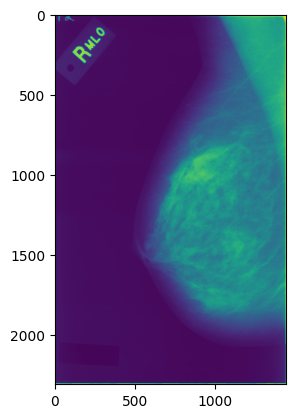

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Cancer/0002/C_0002_1.LEFT_CC.png


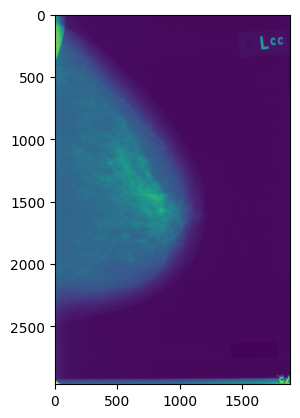

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Cancer/0002/C_0002_1.LEFT_MLO.png


In [87]:
# Cancer class
base = '/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16'
c = 0
for fn in df_cancer['fullPath'].to_list():
    fn_path = os.path.join(base,fn)
    print(fn_path)
    c +=1
    if c == 6: break
    img = mpimg.imread(fn_path)
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Normal/0002/A_0002_1.LEFT_CC.png


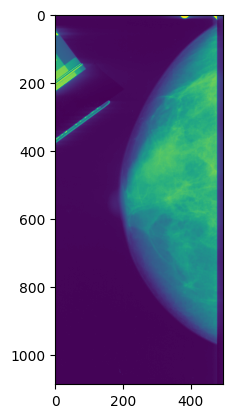

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Normal/0002/A_0002_1.LEFT_MLO.png


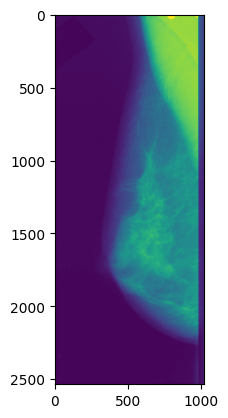

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Normal/0002/A_0002_1.RIGHT_CC.png


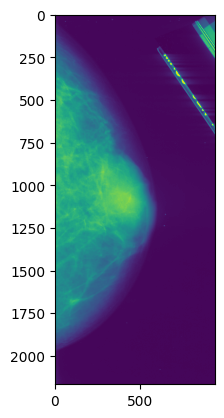

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Normal/0002/A_0002_1.RIGHT_MLO.png


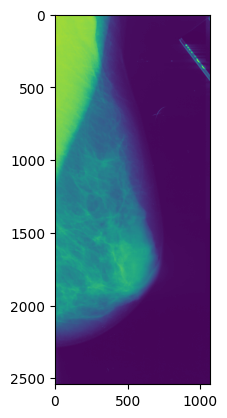

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Normal/0003/A_0003_1.LEFT_CC.png


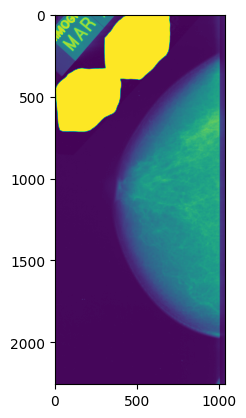

/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16/Normal/0003/A_0003_1.LEFT_MLO.png


In [88]:
# Normal class
base = '/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16'
c = 0
for fn in df_normal['fullPath'].to_list():
    fn_path = os.path.join(base,fn)
    print(fn_path)
    c +=1
    if c == 6: break
    img = mpimg.imread(fn_path)
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

# Preprocessing
- you can scrap the video data set via each class's `fullPath` columns
- Preprocess
    - resizing image to 224 X 224 X 1 [H * W * C]

## Resizing

In [137]:
def preprocess_image(image_path, output_path, size):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, size)
    cv2.imwrite(output_path, img_resized)

In [171]:
!mkdir /kaggle/working/Cancer
!mkdir /kaggle/working/Normal

### Cancer

In [ ]:
# Create destination directory if it does not exist
des_base_path = '/kaggle/working/Cancer'

os.makedirs(des_base_path, exist_ok=True)


# Iterate over the DataFrame with tqdm
for fp, fn in tqdm(zip(df_cancer['fullPath'].to_list(), df_cancer['fileName'].to_list()), total=len(df_cancer)):
    fn_path = os.path.join(base, fp)
    fn_des_path = os.path.join(des_base_path, fn)
    preprocess_image(fn_path, fn_des_path, (256, 256))

### Normal

In [ ]:
# Define base paths
base = '/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16'
des_base_path = '/kaggle/working/Normal'

# Create destination directory if it does not exist
os.makedirs(des_base_path, exist_ok=True)

# Iterate over the DataFrame with tqdm
for fp, fn in tqdm(zip(df_normal['fullPath'].to_list(), df_normal['fileName'].to_list()), total=len(df_normal)):
    fn_path = os.path.join(base, fp)
    fn_des_path = os.path.join(des_base_path, fn)
    preprocess_image(fn_path, fn_des_path, (256, 256))

## Augmentation
- The augmentation will be carry out to increase 50% number of dataset
- NOTES:
    - Can futher tune of the contrast parts
    - Can consider random select one augmentaion choices 

In [175]:

# Define augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(scale_limit=0.2, rotate_limit=30, shift_limit=0.1, p=0.5),
    A.RandomBrightnessContrast(p=0.05), #NOTE: should further tune this
    ToTensorV2()
])

def augment_image(image_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    
    # Apply transformations
    augmented = transform(image=image)
    augmented_image = augmented['image']
    
    return augmented_image


In [179]:
# Define base path
Cancer_base = '/kaggle/working/Cancer'

# List all files in the base directory
files = os.listdir(Cancer_base)

# Iterate over the files with tqdm
for file in tqdm(files, desc='Processing Images'):
    fp = os.path.join(Cancer_base, file)  
    dp = os.path.join(Cancer_base, 'aug_'+file)  # Path to the file
    # Augment the image
    augmented_image = augment_image(fp)
    
    # Convert tensor to numpy array and save
    augmented_image_np = augmented_image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
    augmented_image_np = (augmented_image_np * 255).astype('uint8')  # Convert to uint8
    cv2.imwrite(dp, augmented_image_np)

Processing Images: 100%|██████████| 33/33 [00:00<00:00, 193.67it/s]


In [180]:
# Define base path
Normal_base = '/kaggle/working/Normal'

# List all files in the base directory
files = os.listdir(Normal_base)

# Iterate over the files with tqdm
for file in tqdm(files, desc='Processing Images'):
    fp = os.path.join(Normal_base, file)  
    dp = os.path.join(Normal_base, 'aug_'+file)  # Path to the file
    # Augment the image
    augmented_image = augment_image(fp)
    
    # Convert tensor to numpy array and save
    augmented_image_np = augmented_image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
    augmented_image_np = (augmented_image_np * 255).astype('uint8')  # Convert to uint8
    cv2.imwrite(dp, augmented_image_np)

Processing Images: 100%|██████████| 34/34 [00:00<00:00, 179.49it/s]
